In [1]:
from string import punctuation
from gensim.models import Word2Vec
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#% matplotlib inline

In [ ]:
# сет из Kaggle  https://www.kaggle.com/rtatman/blog-authorship-corpus

In [2]:
data=pd.read_csv('blogtext.csv')

In [3]:
data.text.str.len().describe()

count    681284.000000
mean       1120.730698
std        2328.437003
min           4.000000
25%         230.000000
50%         637.000000
75%        1407.000000
max      790123.000000
Name: text, dtype: float64

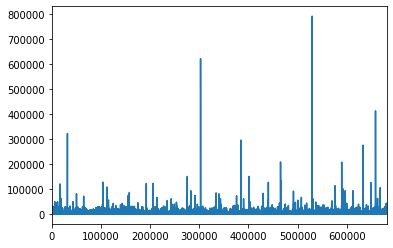

In [4]:
data.text.str.len().plot()

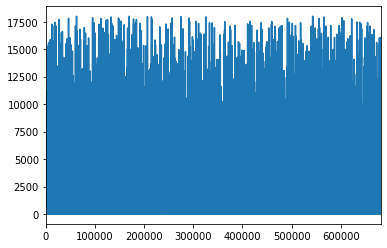

In [5]:
data1 = data.loc[(data.text.str.len() < 18000) & (data.text.str.len() > 7)]
data1.text.str.len().plot()

In [6]:
data.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [7]:
data["word_count"] = data.text.str.split().str.len()

In [8]:
data["char_length"] = data.text.str.len()

In [9]:
data["id_count"] = data.groupby("id")["id"].transform("count")

In [10]:
data.head()

,id,gender,age,topic,sign,date,text,word_count,char_length,id_count
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",28,157,4
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,20,181,4
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,4326,25467,4
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2,43,4
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,65,402,70


In [11]:
data.to_csv('blogtext1.csv', index=False)

In [2]:
data=pd.read_csv('blogtext1.csv')

In [3]:
data.iloc[13]

id                                                       3581210
gender                                                      male
age                                                           33
topic                                          InvestmentBanking
sign                                                    Aquarius
date                                                09,June,2004
text                        There is so much that is differen...
word_count                                                    64
char_length                                                  371
id_count                                                      70
Name: 13, dtype: object

In [4]:
data1=data[data.word_count<20]

In [5]:
data1.head()

,id,gender,age,topic,sign,date,text,word_count,char_length,id_count
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2,43,4
31,3581210,male,33,InvestmentBanking,Aquarius,"29,June,2004",urlLink The business class ta...,18,132,70
95,4172416,female,25,indUnk,Capricorn,"08,August,2004","urlLink im new to this, ...",16,103,2
129,4030905,female,17,Student,Aries,"03,August,2004",Doing VB prac now. so boring....,16,112,25
138,3705830,male,25,Non-Profit,Cancer,"23,June,2004",we are drinking and talking of unrequit...,9,63,46


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106080 entries, 3 to 681281
Data columns (total 10 columns):
id             106080 non-null int64
gender         106080 non-null object
age            106080 non-null int64
topic          106080 non-null object
sign           106080 non-null object
date           106080 non-null object
text           106080 non-null object
word_count     106080 non-null int64
char_length    106080 non-null int64
id_count       106080 non-null int64
dtypes: int64(5), object(5)
memory usage: 8.9+ MB


In [7]:
discard_punctuation_and_lowercased_sents = [[word.lower() for word in sent.split(" ") if word not in punctuation and word.isalpha()] 
                                            for sent in data1.text]
#discard_punctuation_and_lowercased_sents[6]

In [8]:
len(discard_punctuation_and_lowercased_sents)

106080

In [9]:
w2v = Word2Vec(discard_punctuation_and_lowercased_sents, min_count=10, size=200, iter=10)
word_vectors = w2v.wv
len(word_vectors.vocab)

4887

In [10]:
vocab = list(word_vectors.vocab)

In [11]:
#vocab

In [12]:
X = w2v[vocab]
X

D:\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.25901178,  0.668241  , -0.33407927, ..., -0.03810713,
        -0.00195973,  0.02238412],
       [-0.15769325,  0.056564  ,  0.02346028, ...,  0.15782912,
         0.39932328, -0.90048844],
       [ 0.0521595 , -0.03462341, -0.23200698, ...,  0.10289321,
        -0.19455388, -0.00140891],
       ...,
       [ 0.1792725 ,  0.11295088, -0.38922438, ...,  0.08110345,
        -0.09543376,  0.03349249],
       [ 0.12959288, -0.11882216, -0.19046582, ...,  0.03636787,
         0.02823156,  0.09741197],
       [ 0.130451  , -0.13596354, -0.22925955, ...,  0.04760424,
         0.05293758,  0.14103363]], dtype=float32)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [15]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4887 entries, urllink to maddie
Data columns (total 2 columns):
x    4887 non-null float32
y    4887 non-null float32
dtypes: float32(2)
memory usage: 76.4+ KB


In [18]:
df1 = df.iloc[:130]

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, urllink to check
Data columns (total 2 columns):
x    130 non-null float32
y    130 non-null float32
dtypes: float32(2)
memory usage: 2.0+ KB


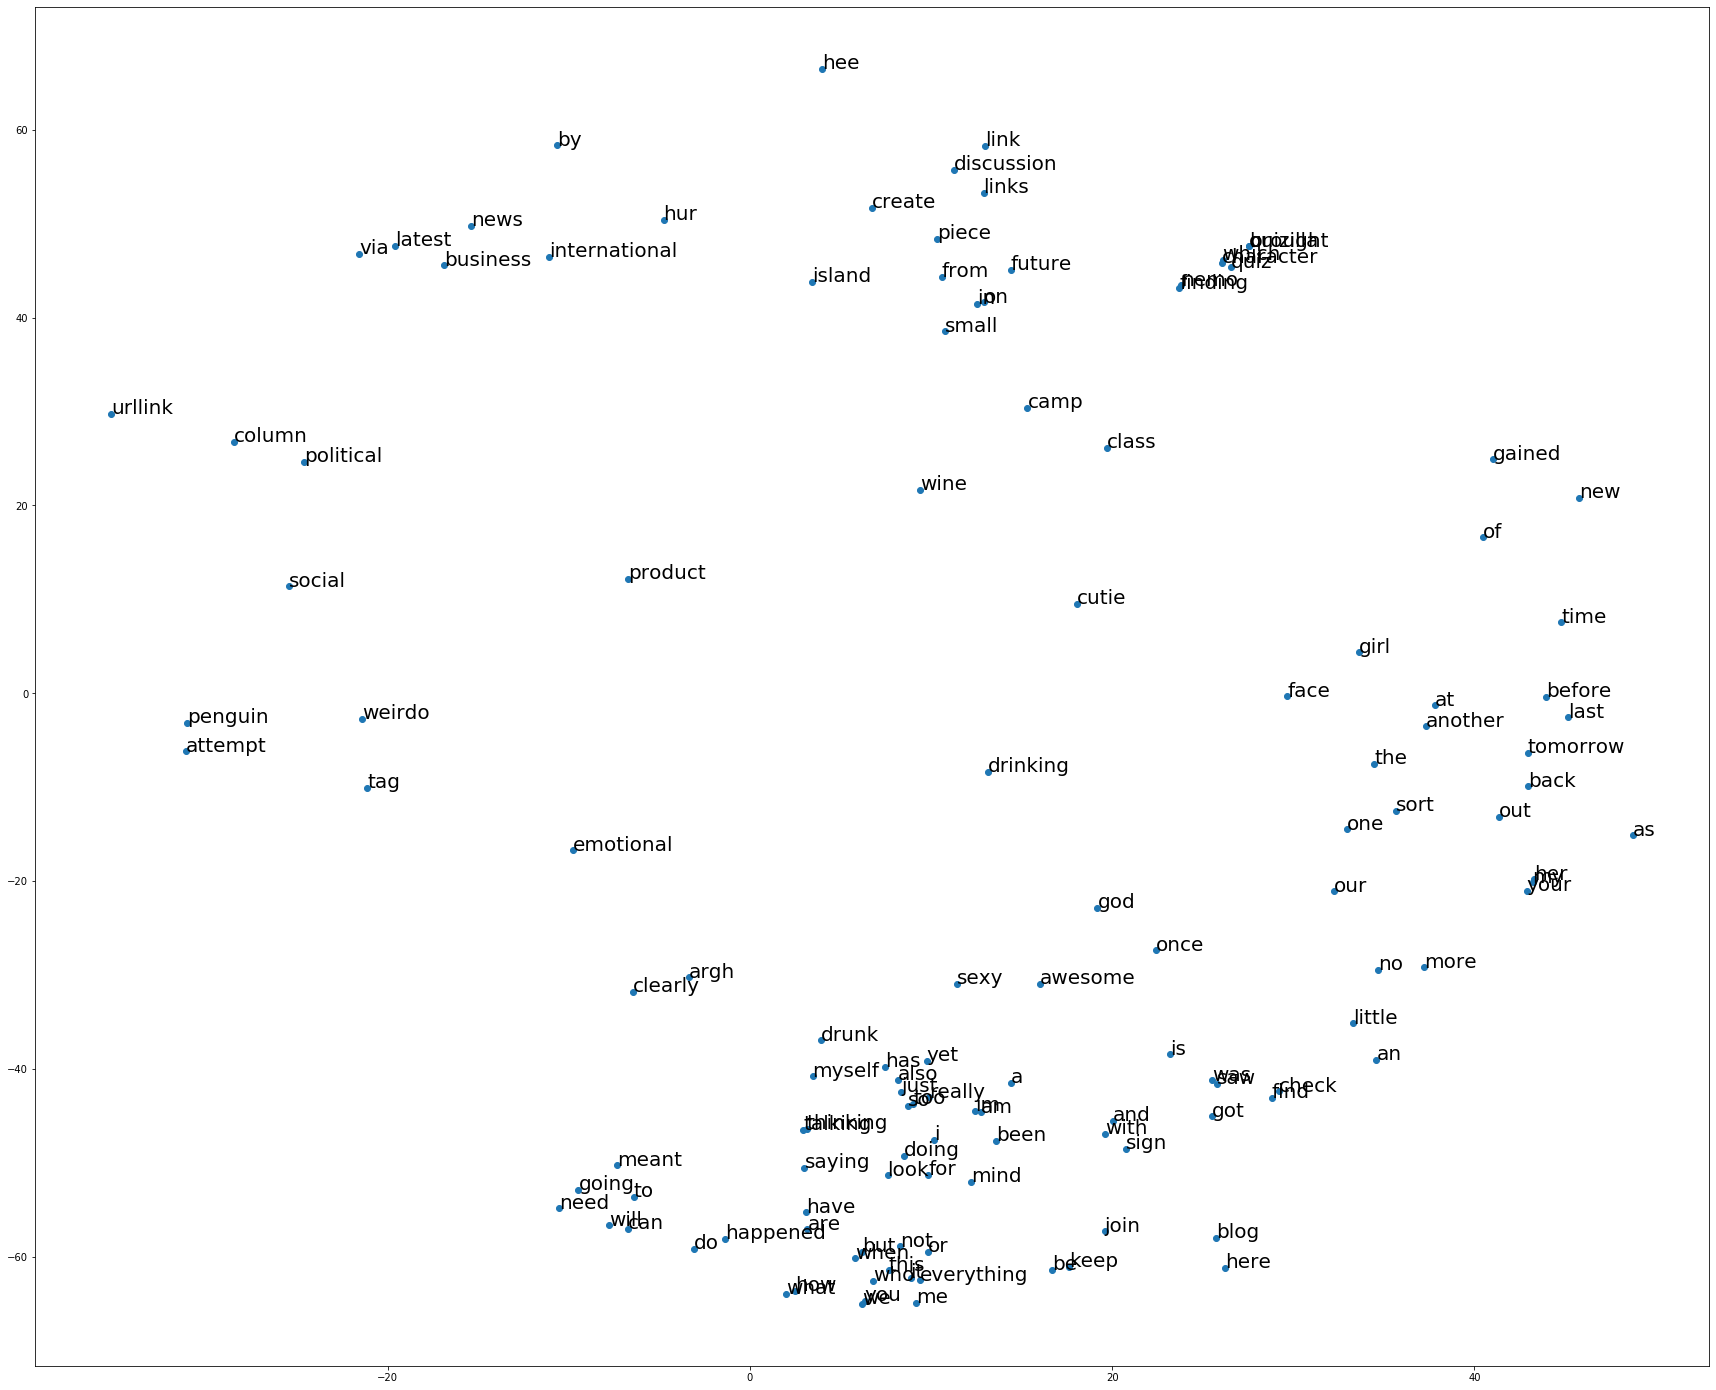

In [20]:
def plot1(df):
    fig = plt.figure(figsize=(30, 25))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df['x'], df['y'])
    for word, pos in df.iterrows():
        ax.annotate(word, pos , size=20)
    plt.savefig("1.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

plot1(df1)

In [21]:
model_ak = w2v

words = []
embeddings = []
for word in list(model_ak.wv.vocab):
    embeddings.append(model_ak.wv[word])
    words.append(word)
    
tsne_ak_2d = TSNE(n_components=2, init='pca', n_iter=500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings)

In [22]:
#words

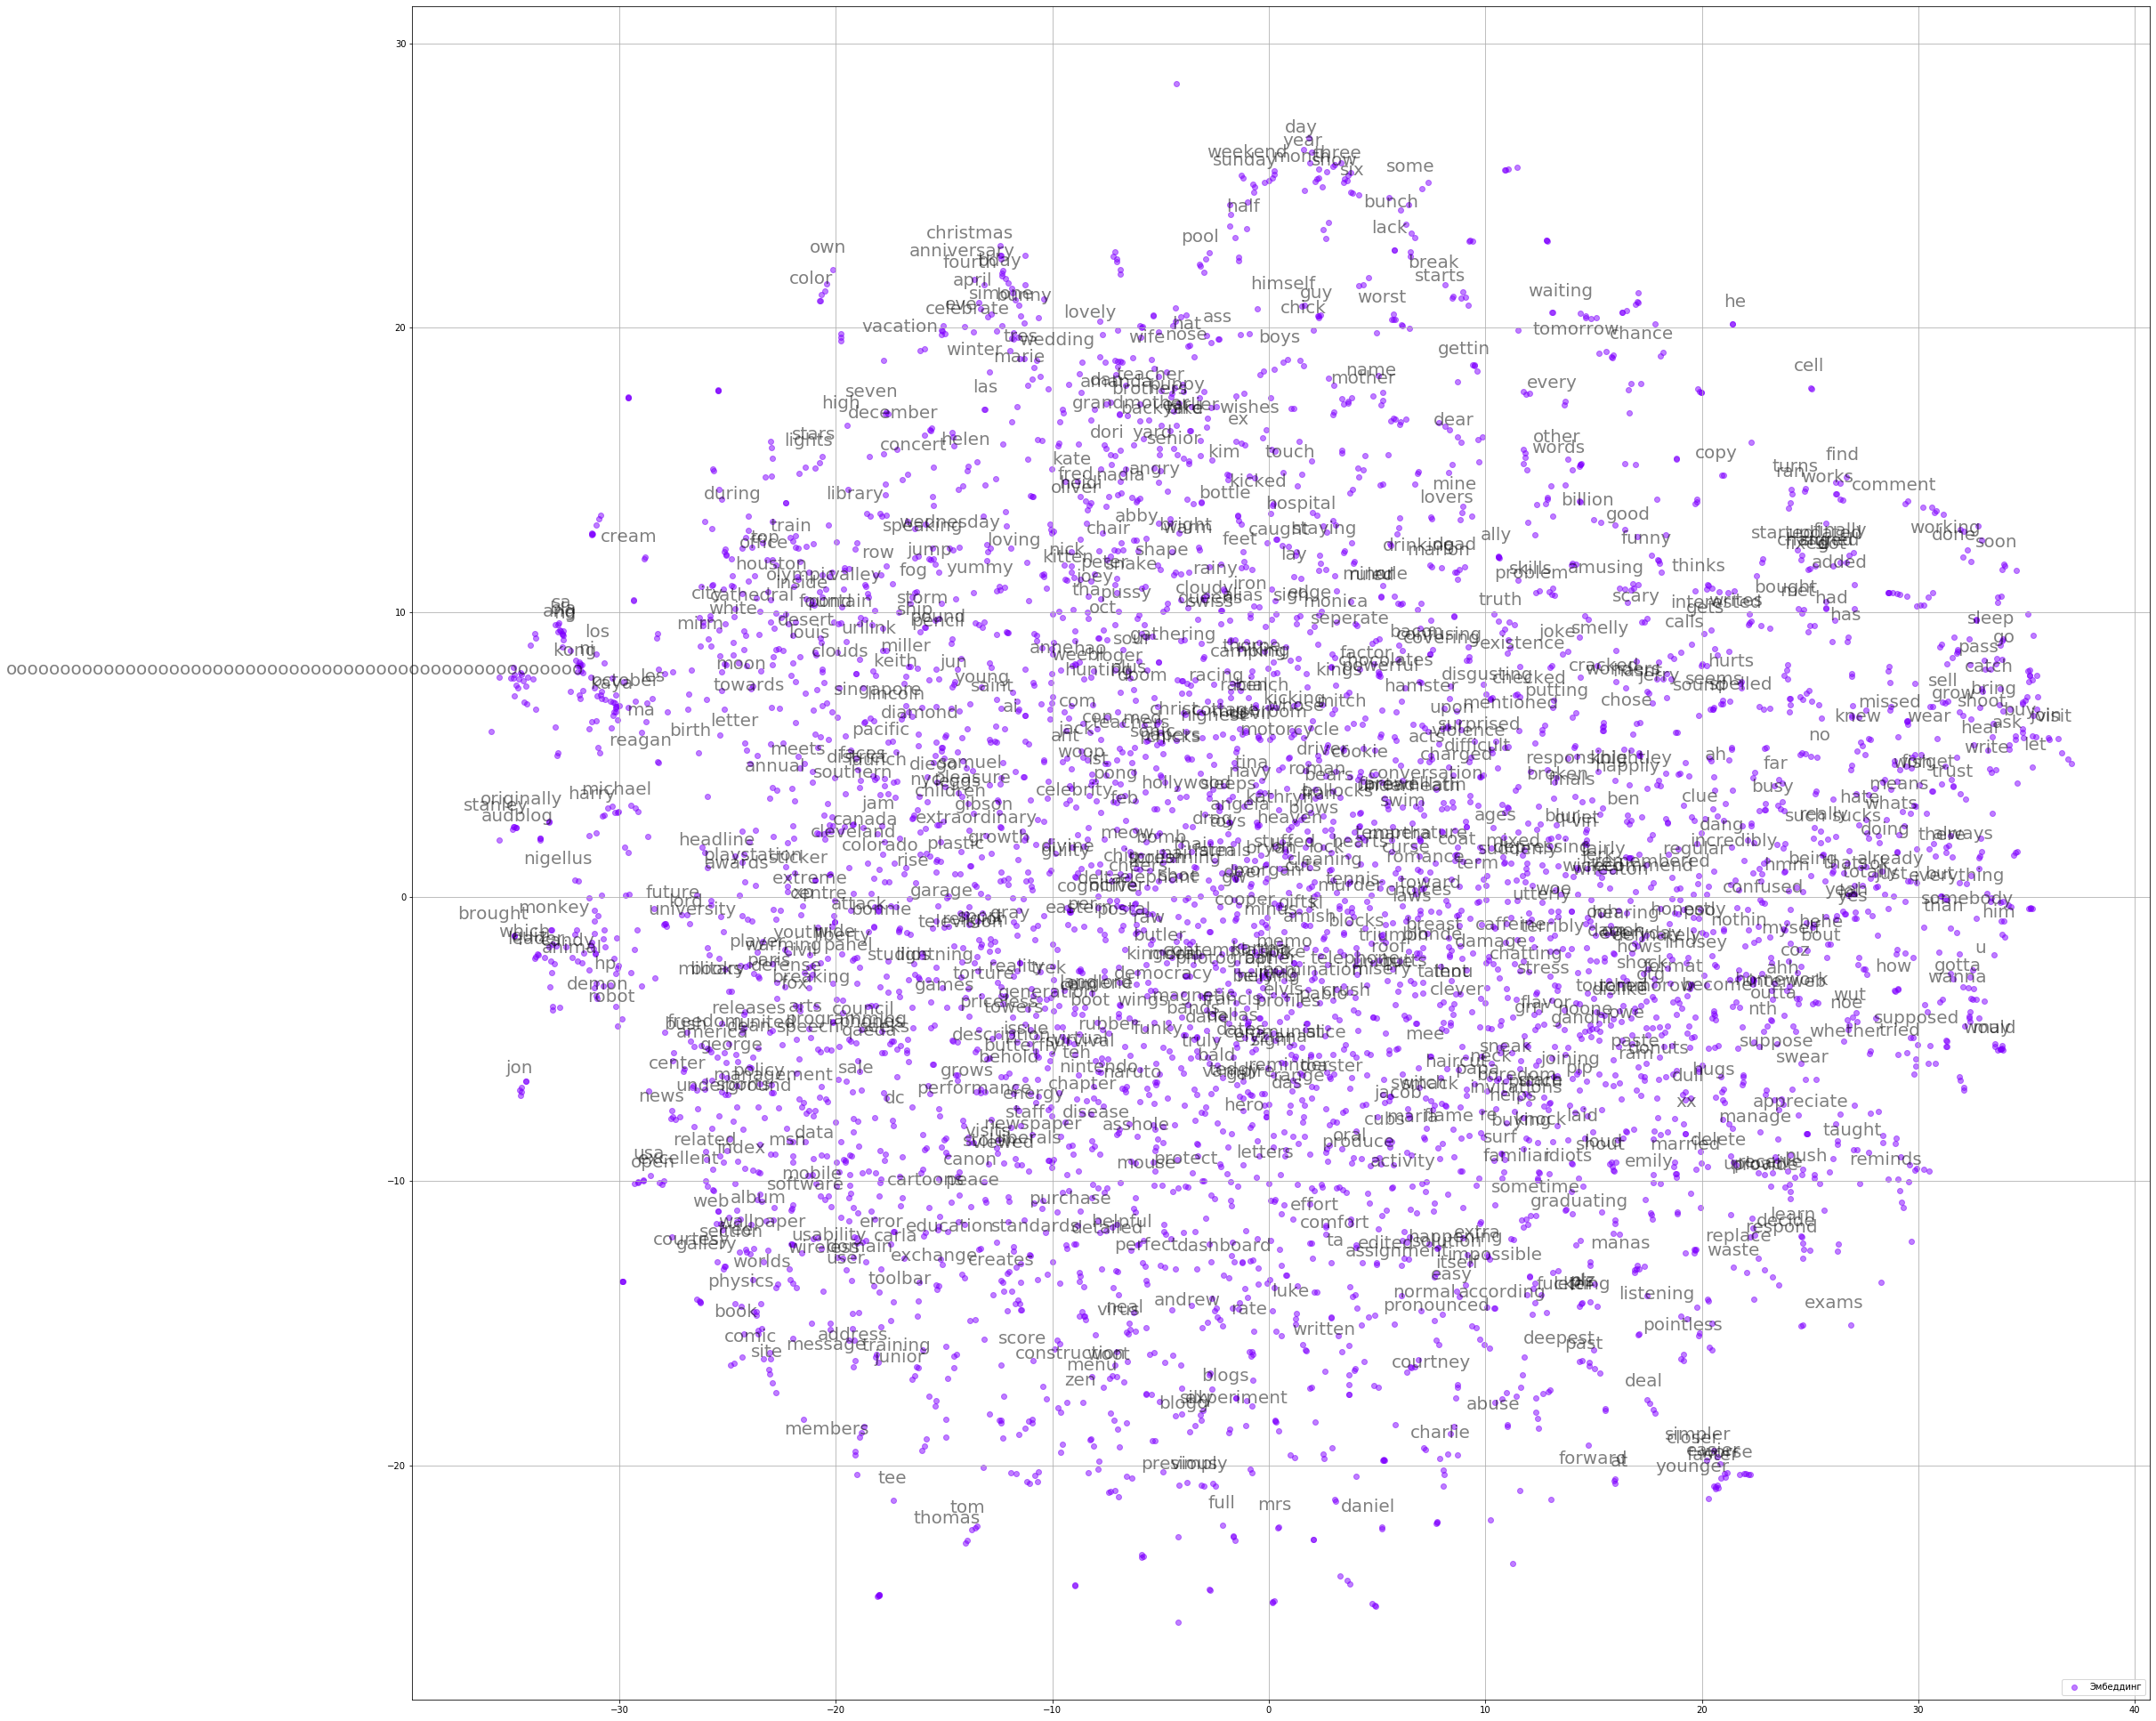

In [23]:
def tsne_plot_2d(label, embeddings, words, a=1):
    plt.figure(figsize=(35, 35))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    j=-1
    for i, word in enumerate(words):
        j+=1
        if j%6==0: #каждое 6 слово , для нагляжности
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(15, 15), 
                         textcoords='offset points', ha='right', va='bottom', size=20)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("2.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_2d('Эмбеддинг', embeddings_ak_2d,words, a=0.5)

In [27]:
model_wp =  w2v

words_wp = []
embeddings_wp = []
for word in list(model_wp.wv.vocab):
    embeddings_wp.append(model_wp.wv[word])
    words_wp.append(word)
    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=700, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

D:\Program\Anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


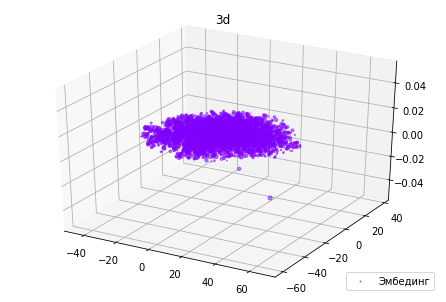

In [28]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.savefig("3.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_3d('3d', 'Эмбединг', embeddings_wp_3d, a=0.5)